In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

file_path = './heart_disease_health_indicators_BRFSS2015 2 (1).csv'

df = pd.read_csv(file_path)

# Data Cleaning and Processing

# 1. Handle Missing Values
# You can either remove rows with missing values or impute them with mean, median, or other strategies.
df.dropna(inplace=True) # Example: Remove rows with any missing values

# 2. Remove Duplicates
df.drop_duplicates(inplace=True)

# 3. Convert Data Types
categorical_columns = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                       'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

df[categorical_columns] = df[categorical_columns].astype('category')

sns.set_theme(style="whitegrid")

# Print the processed dataframe
print(df.head())


  HeartDiseaseorAttack HighBP HighChol CholCheck  BMI Smoker Stroke Diabetes  \
0                    0      1        1         1   40      1      0        0   
1                    0      0        0         0   25      1      0        0   
2                    0      1        1         1   28      0      0        0   
3                    0      1        0         1   27      0      0        0   
4                    0      1        1         1   24      0      0        0   

  PhysActivity Fruits  ... AnyHealthcare NoDocbcCost GenHlth MentHlth  \
0            0      0  ...             1           0       5       18   
1            1      0  ...             0           1       3        0   
2            0      1  ...             1           1       5       30   
3            1      1  ...             1           0       2        0   
4            1      1  ...             1           0       2        3   

  PhysHlth  DiffWalk  Sex Age Education Income  
0       15         1    0   9  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  229781 non-null  category
 1   HighBP                229781 non-null  category
 2   HighChol              229781 non-null  category
 3   CholCheck             229781 non-null  category
 4   BMI                   229781 non-null  int64   
 5   Smoker                229781 non-null  category
 6   Stroke                229781 non-null  category
 7   Diabetes              229781 non-null  category
 8   PhysActivity          229781 non-null  category
 9   Fruits                229781 non-null  category
 10  Veggies               229781 non-null  category
 11  HvyAlcoholConsump     229781 non-null  category
 12  AnyHealthcare         229781 non-null  category
 13  NoDocbcCost           229781 non-null  category
 14  GenHlth               229781 non-nul

In [5]:
df.describe()

,BMI,MentHlth,PhysHlth
count,229781.00000,229781.000000,229781.000000
mean,28.68567,3.505373,4.675178
std,6.78636,7.713725,9.046568
min,12.00000,0.000000,0.000000
25%,24.00000,0.000000,0.000000
50%,27.00000,0.000000,0.000000
75%,32.00000,2.000000,4.000000
max,98.00000,30.000000,30.000000


# Univariate Analysis

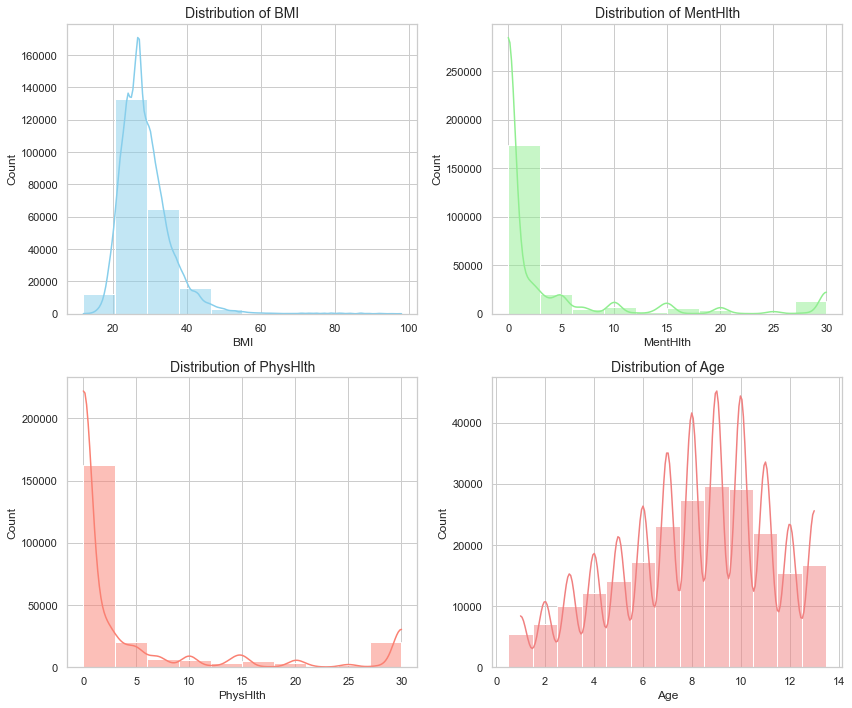

In [6]:
# Univariate analysis: Distribution of continuous variables (BMI, MentHlth, PhysHlth, Age)
continuous_vars = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

# Define a list of colors for the histograms
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral']

# Create histograms for continuous variables in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, var in enumerate(continuous_vars):
    row = i // 2  # Determine row for 2x2 grid
    col = i % 2   # Determine column for 2x2 grid
    sns.histplot(df[var], bins=10, kde=True, ax=axes[row, col], color=colors[i])  # Apply unique color
    axes[row, col].set_title(f'Distribution of {var}', fontsize=14)
    axes[row, col].set_xlabel(var)

plt.tight_layout()
plt.show()

## Investigate the prevalence of health conditions

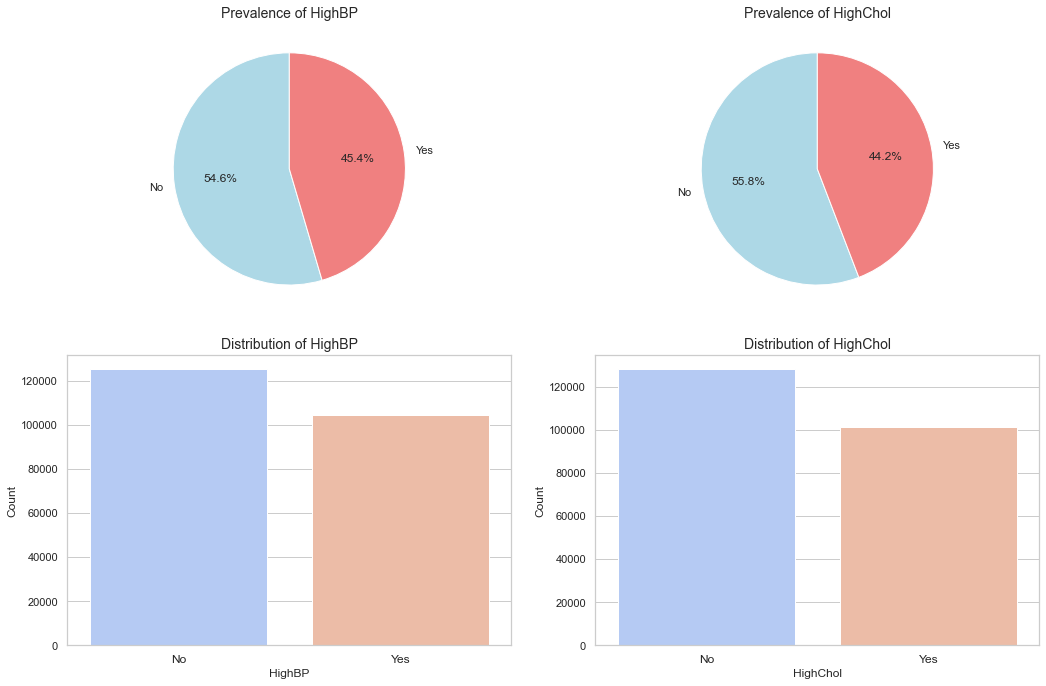

In [7]:
# List of health condition columns to analyze
health_conditions = ['HighBP', 'HighChol']

# Initialize the figure with a size for 3x3 grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 3 columns

# Plot pie charts in the first row
for i, condition in enumerate(health_conditions):
    # Pie chart for each health condition
    data = df[condition].value_counts()
    axes[0, i].pie(data, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
    axes[0, i].set_title(f'Prevalence of {condition}', fontsize=14)

# Plot bar charts in the second row
for i, condition in enumerate(health_conditions):
    # Bar chart for each health condition
    sns.countplot(x=condition, data=df, palette='coolwarm', ax=axes[1, i])
    axes[1, i].set_title(f'Distribution of {condition}', fontsize=14)
    axes[1, i].set_xlabel(f'{condition}', fontsize=12)
    axes[1, i].set_ylabel('Count', fontsize=12)
    axes[1, i].set_xticks([0, 1])
    axes[1, i].set_xticklabels(['No', 'Yes'], fontsize=12)

# Adjust layout for better spacing
plt.tight_layout(pad=2.0)
plt.show()

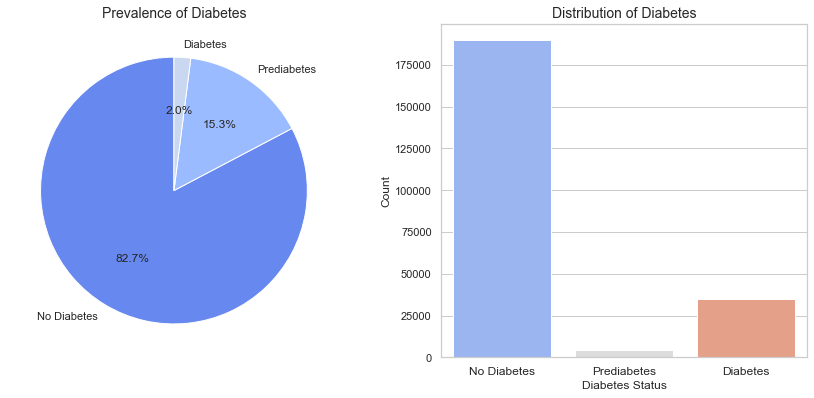

In [8]:
# Define labels for the Diabetes categories
diabetes_labels = ['No Diabetes', 'Prediabetes', 'Diabetes']

# Initialize the figure with a 1x2 grid for the pie chart and count plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Diabetes
diabetes_data = df['Diabetes'].value_counts()
axes[0].pie(diabetes_data, labels=diabetes_labels, autopct='%1.1f%%', colors=sns.color_palette('coolwarm'), startangle=90)
axes[0].set_title('Prevalence of Diabetes', fontsize=14)

# Count plot for Diabetes
sns.countplot(x='Diabetes', data=df, palette='coolwarm', ax=axes[1])
axes[1].set_title('Distribution of Diabetes', fontsize=14)
axes[1].set_xlabel('Diabetes Status', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(diabetes_labels, fontsize=12)

# Adjust layout for better spacing
plt.tight_layout(pad=2.0)
plt.show()

## Analyze the Distribution of the target variable i.e, HeartDiseaseorAttack

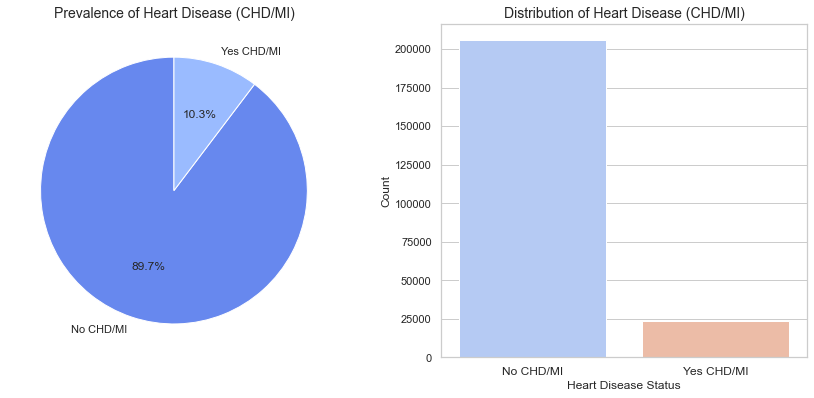

In [9]:
# Define labels for the HeartDiseaseorAttack categories
heart_disease_labels = ['No CHD/MI', 'Yes CHD/MI']

# Initialize the figure with a 1x2 grid for the pie chart and count plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for HeartDiseaseorAttack
heart_disease_data = df['HeartDiseaseorAttack'].value_counts()
axes[0].pie(heart_disease_data, labels=heart_disease_labels, autopct='%1.1f%%', colors=sns.color_palette('coolwarm'), startangle=90)
axes[0].set_title('Prevalence of Heart Disease (CHD/MI)', fontsize=14)

# Count plot for HeartDiseaseorAttack
sns.countplot(x='HeartDiseaseorAttack', data=df, palette='coolwarm', ax=axes[1])
axes[1].set_title('Distribution of Heart Disease (CHD/MI)', fontsize=14)
axes[1].set_xlabel('Heart Disease Status', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(heart_disease_labels, fontsize=12)

# Adjust layout for better spacing
plt.tight_layout(pad=2.0)
plt.show()

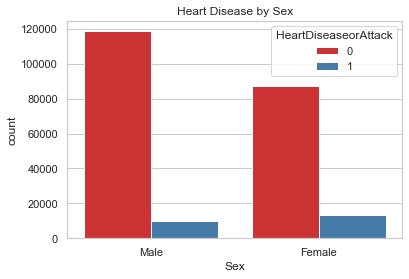

In [10]:
# Plot heart disease by sex
sns.countplot(x='Sex', hue='HeartDiseaseorAttack', data=df, palette='Set1')

# Update x-tick labels to "Male" and "Female"
plt.xticks([0, 1], ['Male', 'Female'])

# Add title
plt.title('Heart Disease by Sex')

# Show plot
plt.show()

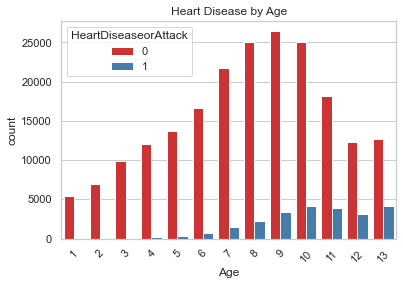

In [11]:
# Plot heart disease by sex
sns.countplot(x='Age', hue='HeartDiseaseorAttack', data=df, palette='Set1')
plt.xticks(rotation=45)

# Add title
plt.title('Heart Disease by Age')

# Show plot
plt.show()

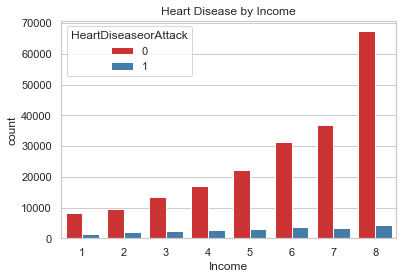

In [12]:
# Plot heart disease by sex
sns.countplot(x='Income', hue='HeartDiseaseorAttack', data=df, palette='Set1')

# Add title
plt.title('Heart Disease by Income')

# Show plot
plt.show()

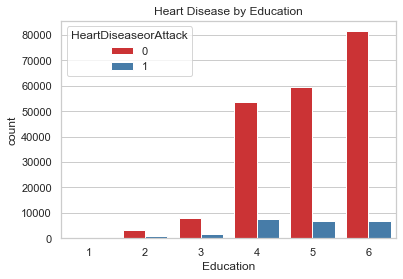

In [13]:
# Plot heart disease by sex
sns.countplot(x='Education', hue='HeartDiseaseorAttack', data=df, palette='Set1')

# Add title
plt.title('Heart Disease by Education')

# Show plot
plt.show()

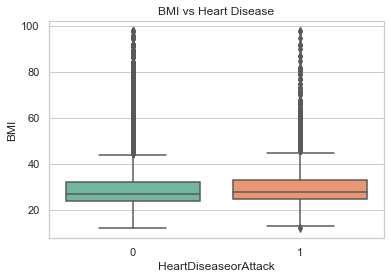

In [14]:
sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=df, palette='Set2')
plt.title('BMI vs Heart Disease')
plt.show()



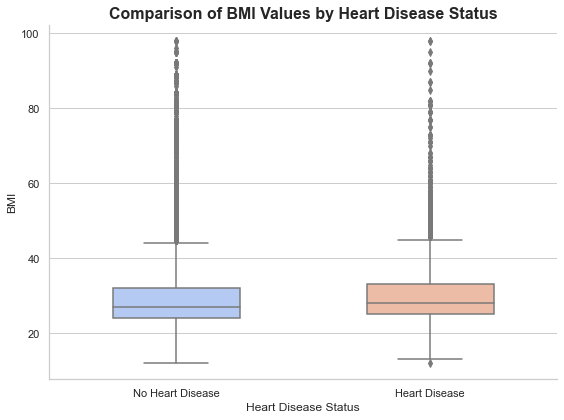

In [15]:
# Set the style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 2)

# Create a boxplot for BMI vs Heart Disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=df, palette=palette, width=0.5)

# Customize x-tick labels
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])

# Set titles and labels
plt.title('Comparison of BMI Values by Heart Disease Status', fontsize=16, fontweight='bold')
plt.xlabel('Heart Disease Status', fontsize=12)
plt.ylabel('BMI', fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


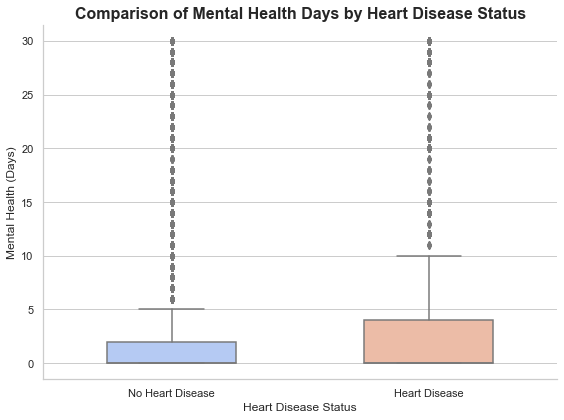

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDiseaseorAttack', y='MentHlth', data=df, palette=palette, width=0.5)

# Customize x-tick labels
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])

# Set titles and labels
plt.title('Comparison of Mental Health Days by Heart Disease Status', fontsize=16, fontweight='bold')
plt.xlabel('Heart Disease Status', fontsize=12)
plt.ylabel('Mental Health (Days)', fontsize=12)

# Remove top and right spines
sns.despine()

# Show plot
plt.tight_layout()
plt.show()


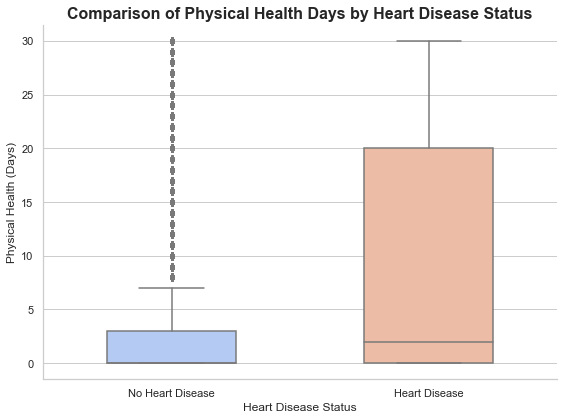

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDiseaseorAttack', y='PhysHlth', data=df, palette=palette, width=0.5)

# Customize x-tick labels
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])

# Set titles and labels
plt.title('Comparison of Physical Health Days by Heart Disease Status', fontsize=16, fontweight='bold')
plt.xlabel('Heart Disease Status', fontsize=12)
plt.ylabel('Physical Health (Days)', fontsize=12)

# Remove top and right spines
sns.despine()

# Show plot
plt.tight_layout()
plt.show()


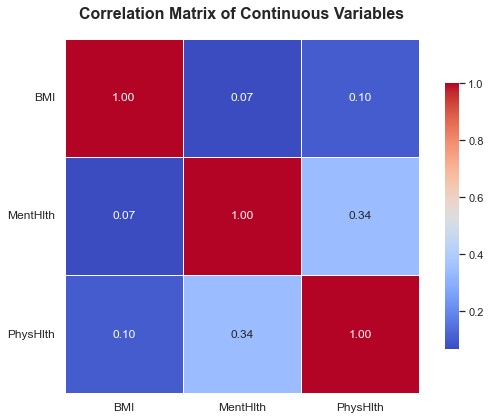

In [18]:
# Compute correlation matrix
corr = df[['BMI', 'MentHlth', 'PhysHlth']].corr()

# Set the figure size
plt.figure(figsize=(8, 6))

# Customize the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 12}, cbar_kws={"shrink": 0.75}, square=True)

# Add a title with bold font
plt.title('Correlation Matrix of Continuous Variables', fontsize=16, fontweight='bold', pad=20)

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

# Add some space between the plot and title
plt.tight_layout()

# Show plot
plt.show()

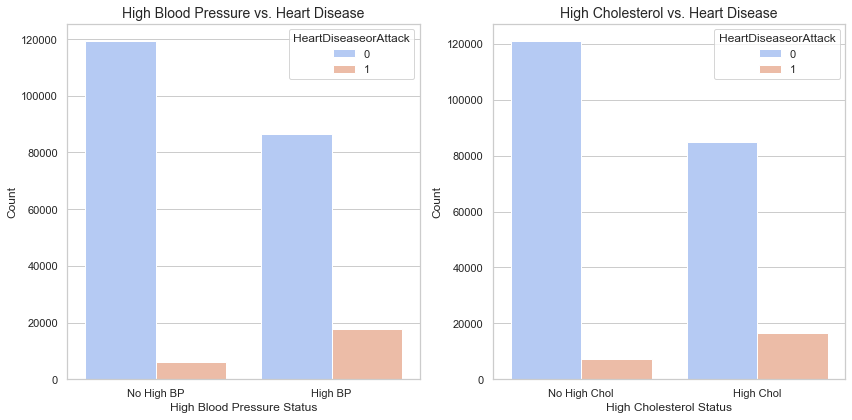

In [19]:

# Set plot style
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(12, 6))

# Compare HighBP distribution
plt.subplot(1, 2, 1)
sns.countplot(x='HighBP', hue='HeartDiseaseorAttack', data=df, palette='coolwarm')
plt.title('High Blood Pressure vs. Heart Disease', fontsize=14)
plt.xlabel('High Blood Pressure Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No High BP', 'High BP'])

# Compare HighChol distribution
plt.subplot(1, 2, 2)
sns.countplot(x='HighChol', hue='HeartDiseaseorAttack', data=df, palette='coolwarm')
plt.title('High Cholesterol vs. Heart Disease', fontsize=14)
plt.xlabel('High Cholesterol Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No High Chol', 'High Chol'])

# Layout adjustment
plt.tight_layout()
plt.show()
